In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [91]:
import numpy as np

In [19]:
df = pd.read_csv('FinalData.csv')
df

,DATE,Target WL,BRWL1,LaRWL1,LRWL1,WTDWL2,C1RS,C1RS1,C1RS2,C1RS3,...,C2RS7,C2RS14,C2RSF,C3RS,C3RS1,C3RS2,C3RS3,C3RS7,C3RS14,C3RSF
0,01-01-2008,23.957143,6.717062,100.225000,NaN,246.252667,0.0,0.000000,0.053395,0.046108,...,1.209958,0.029673,0.0,0.0,0.000000,0.000000,0.119422,0.000000,0.593018,0.0
1,02-01-2008,22.817857,5.316635,100.558333,7.800000,246.181000,0.0,0.059925,0.205128,4.435959,...,7.482079,7.808828,0.0,0.0,0.000000,0.168930,15.651476,12.085770,9.532964,0.0
2,03-01-2008,21.076761,3.890351,107.760870,7.400000,246.136000,0.1,0.160320,15.359470,12.454148,...,4.990740,1.809660,6.0,0.0,0.227915,5.024606,10.654156,3.012264,0.985087,0.0
3,04-01-2008,20.833133,4.086041,107.333333,NaN,246.088500,0.2,5.687511,4.512457,4.020394,...,4.436248,11.138125,6.0,0.3,4.380131,5.905834,2.074785,7.950361,6.899696,6.0
4,05-01-2008,25.890751,5.325810,110.291429,12.966667,NaN,12.0,7.029506,2.938470,0.224717,...,0.358826,2.165985,6.0,14.0,6.247707,2.141134,0.207832,0.000000,0.000000,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5839,27-12-2023,NaN,58.802830,226.522807,13.856917,249.884446,1.4,0.743940,0.000000,9.335429,...,0.000000,14.375327,6.0,2.8,0.000000,13.805612,17.251582,27.545747,8.409038,4.0
5840,28-12-2023,NaN,55.495442,217.494774,12.769758,249.107560,0.1,1.682619,4.681654,0.763093,...,7.946460,11.177995,6.0,0.3,12.782493,0.592617,1.429676,12.063629,9.029170,4.0
5841,29-12-2023,NaN,49.167769,210.070979,13.774231,248.091162,8.9,6.963262,2.223447,0.000000,...,13.001999,12.476904,6.0,17.6,10.346342,0.000000,6.685611,0.813981,4.013248,4.0
5842,30-12-2023,NaN,47.398300,207.701409,12.958301,247.221227,0.1,2.531287,10.906009,6.787827,...,17.303743,0.000000,6.0,0.1,1.598052,5.983179,19.987744,5.539653,1.975216,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5844 entries, 0 to 5843
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       5844 non-null   object 
 1   Target WL  4319 non-null   float64
 2   BRWL1      5758 non-null   float64
 3   LaRWL1     5401 non-null   float64
 4   LRWL1      5497 non-null   float64
 5   WTDWL2     5510 non-null   float64
 6   C1RS       5834 non-null   float64
 7   C1RS1      5843 non-null   float64
 8   C1RS2      5843 non-null   float64
 9   C1RS3      5843 non-null   float64
 10  C1RS7      5843 non-null   float64
 11  C1RS14     5843 non-null   float64
 12  C1RSF      5834 non-null   float64
 13  C2RS       5843 non-null   float64
 14  C2RS1      5844 non-null   float64
 15  C2RS2      5844 non-null   float64
 16  C2RS3      5844 non-null   float64
 17  C2RS7      5844 non-null   float64
 18  C2RS14     5844 non-null   float64
 19  C2RSF      5843 non-null   float64
 20  C3RS    

In [20]:
df['DATE'] = pd.to_datetime(df['DATE'], format="%d-%m-%Y")

array([<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>], dtype=object)

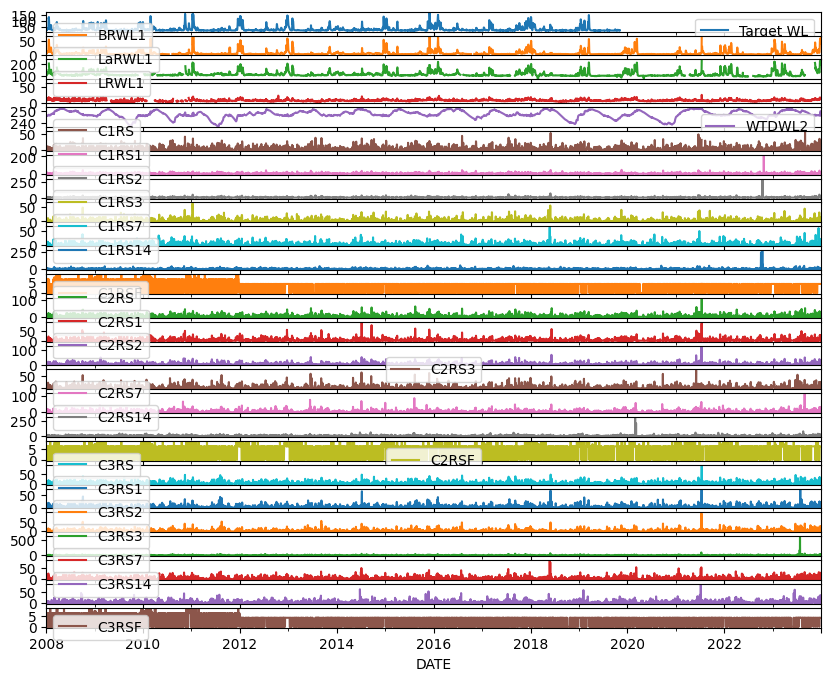

In [6]:
df.set_index('DATE').plot(subplots=True)

In [21]:
df_input=df[['Target WL','BRWL1','LaRWL1','LRWL1','WTDWL2','C1RS','C1RS1','C1RS2','C1RS3','C1RS7','C1RS14','C1RSF','C2RS','C2RS1','C2RS2','C2RS3','C2RS7','C2RS14','C2RSF','C3RS','C3RS1','C3RS2','C3RS3','C3RS7','C3RS14','C3RSF']]

In [22]:
len(['Target WL','BRWL1','LaRWL1','LRWL1','WTDWL2','C1RS','C1RS1','C1RS2','C1RS3','C1RS7','C1RS14','C1RSF','C2RS','C2RS1','C2RS2','C2RS3','C2RS7','C2RS14','C2RSF','C3RS','C3RS1','C3RS2','C3RS3','C3RS7','C3RS14','C3RSF'])

26

In [23]:
df_input=df_input.fillna(method = 'bfill')
df_input

,Target WL,BRWL1,LaRWL1,LRWL1,WTDWL2,C1RS,C1RS1,C1RS2,C1RS3,C1RS7,...,C2RS7,C2RS14,C2RSF,C3RS,C3RS1,C3RS2,C3RS3,C3RS7,C3RS14,C3RSF
0,23.957143,6.717062,100.225000,7.800000,246.252667,0.0,0.000000,0.053395,0.046108,0.000000,...,1.209958,0.029673,0.0,0.0,0.000000,0.000000,0.119422,0.000000,0.593018,0.0
1,22.817857,5.316635,100.558333,7.800000,246.181000,0.0,0.059925,0.205128,4.435959,9.688324,...,7.482079,7.808828,0.0,0.0,0.000000,0.168930,15.651476,12.085770,9.532964,0.0
2,21.076761,3.890351,107.760870,7.400000,246.136000,0.1,0.160320,15.359470,12.454148,4.412484,...,4.990740,1.809660,6.0,0.0,0.227915,5.024606,10.654156,3.012264,0.985087,0.0
3,20.833133,4.086041,107.333333,12.966667,246.088500,0.2,5.687511,4.512457,4.020394,3.421896,...,4.436248,11.138125,6.0,0.3,4.380131,5.905834,2.074785,7.950361,6.899696,6.0
4,25.890751,5.325810,110.291429,12.966667,246.091000,12.0,7.029506,2.938470,0.224717,0.166682,...,0.358826,2.165985,6.0,14.0,6.247707,2.141134,0.207832,0.000000,0.000000,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5839,NaN,58.802830,226.522807,13.856917,249.884446,1.4,0.743940,0.000000,9.335429,5.700149,...,0.000000,14.375327,6.0,2.8,0.000000,13.805612,17.251582,27.545747,8.409038,4.0
5840,NaN,55.495442,217.494774,12.769758,249.107560,0.1,1.682619,4.681654,0.763093,0.983646,...,7.946460,11.177995,6.0,0.3,12.782493,0.592617,1.429676,12.063629,9.029170,4.0
5841,NaN,49.167769,210.070979,13.774231,248.091162,8.9,6.963262,2.223447,0.000000,5.261442,...,13.001999,12.476904,6.0,17.6,10.346342,0.000000,6.685611,0.813981,4.013248,4.0
5842,NaN,47.398300,207.701409,12.958301,247.221227,0.1,2.531287,10.906009,6.787827,6.746944,...,17.303743,0.000000,6.0,0.1,1.598052,5.983179,19.987744,5.539653,1.975216,4.0


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

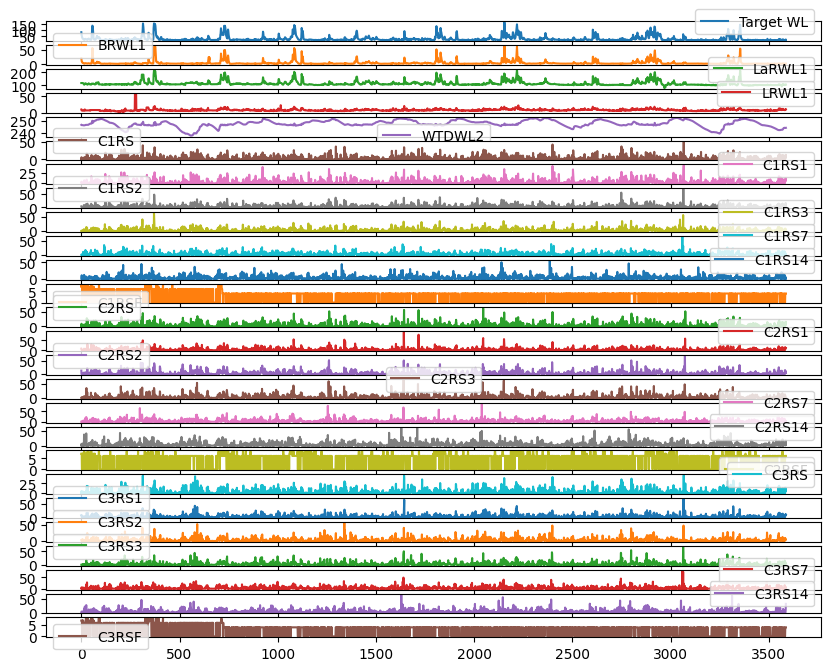

In [8]:
df_input.plot(subplots=True)

In [24]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

In [25]:
df_future_pred=data_scaled[5479:5844]
data_scaled=data_scaled[:4326]

In [27]:
df_input.describe()

,Target WL,BRWL1,LaRWL1,LRWL1,WTDWL2,C1RS,C1RS1,C1RS2,C1RS3,C1RS7,...,C2RS7,C2RS14,C2RSF,C3RS,C3RS1,C3RS2,C3RS3,C3RS7,C3RS14,C3RSF
count,4326.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,...,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000
mean,30.231449,5.609530,115.636502,8.040658,247.497880,2.727105,2.877935,2.875262,2.814580,2.855910,...,3.605644,3.612298,3.701403,2.925103,2.949081,2.977105,3.173737,3.084995,3.139342,2.623203
std,20.089151,7.248609,21.034639,3.072515,2.988506,5.001192,5.608616,6.111833,4.931591,4.839617,...,6.268919,7.536926,3.106197,5.488137,5.242282,5.513186,9.830668,5.272548,5.521677,2.355322
min,17.577167,0.851771,79.850000,2.509091,237.690500,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.054877,2.453327,104.276262,6.373871,246.323692,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.111091,2.960716,108.015120,7.415481,247.360355,0.200000,0.529549,0.556181,0.502348,0.706409,...,0.917354,0.959689,6.000000,0.200000,0.527240,0.474950,0.512401,0.768575,0.782705,4.000000
75%,29.866402,5.107358,117.900353,9.007482,249.900000,3.400000,3.735384,3.875074,3.771967,3.755987,...,4.829524,4.614018,6.000000,3.625000,3.916973,3.880032,3.909321,4.094587,4.051913,4.000000
max,169.489966,64.165805,230.293640,57.350000,252.630000,55.200000,208.678641,285.987510,63.958702,64.027574,...,110.759918,292.557192,8.000000,90.800000,71.981257,94.505577,598.701273,78.228205,84.963473,8.000000


In [28]:
data_scaled

array([[0.04199762, 0.09263809, 0.13543278, ..., 0.        , 0.00697968,
        0.        ],
       [0.03449802, 0.07051934, 0.13764845, ..., 0.15449377, 0.11220073,
        0.        ],
       [0.02303686, 0.0479922 , 0.18552376, ..., 0.03850611, 0.01159424,
        0.        ],
       ...,
       [0.03653954, 0.03137191, 0.1773297 , ..., 0.10240438, 0.00249399,
        0.5       ],
       [0.02066821, 0.02578056, 0.16369406, ..., 0.04589963, 0.12856242,
        0.5       ],
       [0.02073022, 0.02856197, 0.16625452, ..., 0.04860675, 0.36221085,
        0.5       ]])

In [29]:
features=data_scaled[:,1:]
target=data_scaled[:,0]

In [30]:
TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[9.26380906e-02, 1.35432778e-01, 9.64774140e-02, 5.73122708e-01,
          0.00000000e+00, 0.00000000e+00, 1.86703542e-04, 7.20903824e-04,
          0.00000000e+00, 1.78194473e-03, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 1.73642276e-02, 1.09241544e-02,
          1.01426363e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 1.99468915e-04, 0.00000000e+00, 6.97968216e-03,
          0.00000000e+00],
         [7.05193359e-02, 1.37648447e-01, 9.64774140e-02, 5.68325580e-01,
          0.00000000e+00, 2.87165236e-04, 7.17261816e-04, 6.93566187e-02,
          1.51314876e-01, 3.21737307e-02, 0.00000000e+00, 0.00000000e+00,
          2.65183900e-03, 2.01361361e-02, 1.12992561e-01, 6.75522268e-02,
          2.66916297e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          1.78751877e-03, 2.61423801e-02, 1.54493769e-01, 1.12200733e-01,
          0.00000000e+00]]]),
 array([0.02303686]))

In [31]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.15, random_state=123, shuffle = False)

In [36]:
y=df_future_pred[:,0]
x=df_future_pred[:,1:]

In [37]:
x_test.shape

(649, 25)

In [38]:
win_length=7
batch_size=1
num_features=25
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)
pred_generator = TimeseriesGenerator(x, y, length=win_length, sampling_rate=1, batch_size=batch_size)

In [39]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape= (win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 128)            78848     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 7, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 7, 128)            131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 7, 128)            0         
                                                                 
 dropout (Dropout)           (None, 7, 128)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [41]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=5,
                                                    mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit_generator(train_generator, epochs=50,
                    validation_data=test_generator,
                    shuffle=False,
                    callbacks=[early_stopping])

Epoch 1/50


<ipython-input-41-2469c9e0bd9b>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=50,


3670/3670 [==============================] - 86s 22ms/step - loss: 0.0104 - mean_absolute_error: 0.0597 - val_loss: 0.0155 - val_mean_absolute_error: 0.0689
Epoch 2/50
3670/3670 [==============================] - 77s 21ms/step - loss: 0.0139 - mean_absolute_error: 0.0686 - val_loss: 0.0591 - val_mean_absolute_error: 0.2368
Epoch 3/50
3670/3670 [==============================] - 79s 22ms/step - loss: 0.0121 - mean_absolute_error: 0.0664 - val_loss: 0.0620 - val_mean_absolute_error: 0.2375
Epoch 4/50
3670/3670 [==============================] - 79s 22ms/step - loss: 0.0089 - mean_absolute_error: 0.0566 - val_loss: 0.0192 - val_mean_absolute_error: 0.1324
Epoch 5/50
3670/3670 [==============================] - 80s 22ms/step - loss: 0.0089 - mean_absolute_error: 0.0515 - val_loss: 0.0105 - val_mean_absolute_error: 0.0897
Epoch 6/50
3670/3670 [==============================] - 78s 21ms/step - loss: 0.0055 - mean_absolute_error: 0.0450 - val_loss: 0.0072 - val_mean_absolute_error: 0.0772
Epo

In [42]:
model.evaluate_generator(test_generator, verbose=0)

<ipython-input-42-a68ec1088d46>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator, verbose=0)


[0.0011705377837643027, 0.02814542129635811]

In [43]:
predictions=model.predict_generator(test_generator)

<ipython-input-43-6ca49477046f>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions=model.predict_generator(test_generator)


In [44]:
predictions

array([[0.35692063],
       [0.37056318],
       [0.30567554],
       [0.22013247],
       [0.2081646 ],
       [0.14628139],
       [0.09003076],
       [0.05671393],
       [0.04580189],
       [0.04095463],
       [0.04165243],
       [0.04172553],
       [0.03548715],
       [0.03335714],
       [0.03848884],
       [0.0416263 ],
       [0.03469779],
       [0.03351388],
       [0.03063023],
       [0.03059759],
       [0.03194481],
       [0.03276557],
       [0.03185954],
       [0.03228365],
       [0.03156633],
       [0.03517842],
       [0.03810764],
       [0.03283612],
       [0.03169084],
       [0.0327009 ],
       [0.03716748],
       [0.03536891],
       [0.04019301],
       [0.03402884],
       [0.042405  ],
       [0.04729252],
       [0.06197178],
       [0.04883426],
       [0.04717124],
       [0.04954895],
       [0.07361753],
       [0.11760445],
       [0.10594834],
       [0.07882348],
       [0.0522112 ],
       [0.0454086 ],
       [0.04354941],
       [0.049

In [45]:
y_test

array([3.37162685e-01, 3.15570986e-01, 2.78649614e-01, 2.61248947e-01,
       2.48022454e-01, 2.16749073e-01, 3.00638865e-01, 3.56523269e-01,
       3.43789602e-01, 3.02012676e-01, 2.79178600e-01, 1.97017091e-01,
       1.24932326e-01, 7.75051156e-02, 5.68131579e-02, 4.01951745e-02,
       3.01604946e-02, 4.60130266e-02, 3.04072647e-02, 2.38511237e-02,
       2.03182522e-02, 2.59154917e-02, 2.12306292e-02, 1.80647182e-02,
       1.68519212e-02, 1.68506758e-02, 1.63489260e-02, 1.53910435e-02,
       1.48194538e-02, 1.32367605e-02, 1.25993979e-02, 1.11215119e-02,
       1.16255039e-02, 1.08980982e-02, 1.00202770e-02, 9.33146812e-03,
       8.89592431e-03, 1.16379613e-02, 1.02138896e-02, 1.27088887e-02,
       1.28682455e-02, 1.92704146e-02, 3.51657706e-02, 2.53365622e-02,
       2.88168018e-02, 2.27035010e-02, 1.98362298e-02, 1.00432710e-01,
       1.07584083e-01, 8.61464476e-02, 6.53262357e-02, 4.32283505e-02,
       3.48647289e-02, 2.95457692e-02, 2.53110119e-02, 1.99933879e-02,
      

In [46]:
x_test

array([[0.24028132, 0.45227201, 0.15500307, ..., 0.01015713, 0.00569209,
        0.5       ],
       [0.23543578, 0.44774793, 0.12791868, ..., 0.02214777, 0.        ,
        0.        ],
       [0.20496574, 0.41912464, 0.12184261, ..., 0.03891804, 0.03684088,
        0.5       ],
       ...,
       [0.03137191, 0.1773297 , 0.14210574, ..., 0.10240438, 0.00249399,
        0.5       ],
       [0.02578056, 0.16369406, 0.11704628, ..., 0.04589963, 0.12856242,
        0.5       ],
       [0.02856197, 0.16625452, 0.13374566, ..., 0.04860675, 0.36221085,
        0.5       ]])

In [47]:
x_test[:,:][win_length:]

array([[0.22108736, 0.45858213, 0.18236368, ..., 0.        , 0.00452168,
        0.5       ],
       [0.21449723, 0.44729956, 0.17931344, ..., 0.        , 0.        ,
        0.5       ],
       [0.20165468, 0.42734469, 0.14945583, ..., 0.03122255, 0.0458993 ,
        0.5       ],
       ...,
       [0.03137191, 0.1773297 , 0.14210574, ..., 0.10240438, 0.00249399,
        0.5       ],
       [0.02578056, 0.16369406, 0.11704628, ..., 0.04589963, 0.12856242,
        0.5       ],
       [0.02856197, 0.16625452, 0.13374566, ..., 0.04860675, 0.36221085,
        0.5       ]])

In [48]:
df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,:][win_length:])],axis=1)

In [49]:
df_pred

,0,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,0.356921,0.221087,0.458582,0.182364,0.619115,0.085145,0.019110,0.015612,0.000000,0.000000,...,0.000000,0.005388,1.000,0.048458,0.045072,0.029680,0.005422,0.000000,0.004522,0.5
1,0.370563,0.214497,0.447300,0.179313,0.633965,0.061594,0.017396,0.003168,0.000000,0.001480,...,0.000000,0.000000,1.000,0.029736,0.038096,0.004630,0.000000,0.000000,0.000000,0.5
2,0.305676,0.201655,0.427345,0.149456,0.640216,0.016304,0.000000,0.000000,0.002285,0.078253,...,0.002624,0.029980,1.000,0.031938,0.000606,0.000000,0.000008,0.031223,0.045899,0.5
3,0.220132,0.193806,0.413801,0.134896,0.640327,0.000000,0.000000,0.003475,0.004497,0.053538,...,0.025200,0.000598,0.875,0.000000,0.000000,0.003773,0.000000,0.063422,0.034233,0.5
4,0.208165,0.138961,0.352843,0.124402,0.638793,0.000000,0.000332,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000,0.000000,0.001104,0.001975,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,0.034296,0.025259,0.157850,0.095540,0.419392,0.000000,0.043903,0.023997,0.067980,0.065693,...,0.032524,0.006599,0.750,0.000000,0.000000,0.057351,0.005857,0.042511,0.000000,0.0
638,0.042547,0.024859,0.159601,0.110462,0.415292,0.213768,0.024833,0.018034,0.112705,0.000000,...,0.011264,0.002367,0.750,0.158590,0.137032,0.042276,0.007120,0.087671,0.000673,0.5
639,0.062012,0.031372,0.177330,0.142106,0.416082,0.088768,0.021663,0.019682,0.124816,0.048174,...,0.035888,0.003072,0.750,0.044053,0.076350,0.068948,0.015092,0.102404,0.002494,0.5
640,0.055098,0.025781,0.163694,0.117046,0.419909,0.077899,0.058069,0.053933,0.057586,0.052665,...,0.013033,0.056620,0.750,0.060573,0.130590,0.075032,0.008290,0.045900,0.128562,0.5


In [50]:
rev_trans=scaler.inverse_transform(df_pred)

In [51]:
rev_trans

array([[ 71.79797849,  14.84970383, 148.8407643 , ...,   0.        ,
          0.38417755,   4.        ],
       [ 73.87045637,  14.43245645, 147.1433735 , ...,   0.        ,
          0.        ,   4.        ],
       [ 64.01319294,  13.61934266, 144.1412903 , ...,   2.44248396,
          3.89976358,   4.        ],
       ...,
       [ 26.99764908,   2.83805319, 106.528125  , ...,   8.01091084,
          0.21189832,   4.        ],
       [ 25.94721689,   2.4840424 , 104.4767296 , ...,   3.59064549,
         10.92311006,   4.        ],
       [ 26.87892601,   2.66014504, 104.8619355 , ...,   3.80241903,
         30.77469137,   4.        ]])

In [56]:
df_inp=df_input[:4326]
df_final=df_inp[predictions.shape[0]*-1:]

In [57]:
df_final.count()

Target WL    642
BRWL1        642
LaRWL1       642
LRWL1        642
WTDWL2       642
C1RS         642
C1RS1        642
C1RS2        642
C1RS3        642
C1RS7        642
C1RS14       642
C1RSF        642
C2RS         642
C2RS1        642
C2RS2        642
C2RS3        642
C2RS7        642
C2RS14       642
C2RSF        642
C3RS         642
C3RS1        642
C3RS2        642
C3RS3        642
C3RS7        642
C3RS14       642
C3RSF        642
dtype: int64

In [58]:
df_final['WL_Pred']=rev_trans[:,0]

<ipython-input-58-1232e6044f07>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['WL_Pred']=rev_trans[:,0]


In [59]:
df_final

,Target WL,BRWL1,LaRWL1,LRWL1,WTDWL2,C1RS,C1RS1,C1RS2,C1RS3,C1RS7,...,C2RS14,C2RSF,C3RS,C3RS1,C3RS2,C3RS3,C3RS7,C3RS14,C3RSF,WL_Pred
3684,71.737614,14.849704,148.840764,12.510081,246.939775,4.7,3.987819,4.464866,0.000000,0.000000,...,1.576258,8.0,4.4,3.244337,2.804929,3.246285,0.000000,0.384178,4.0,71.797978
3685,69.803207,14.432456,147.143373,12.342803,247.161619,3.4,3.630098,0.905876,0.000000,0.094780,...,0.000000,8.0,2.7,2.742231,0.437591,0.000000,0.000000,0.000000,4.0,73.870456
3686,63.456758,13.619343,144.141290,10.705385,247.255000,0.9,0.000000,0.000000,0.146116,5.010319,...,8.770746,8.0,2.9,0.043631,0.000000,0.004706,2.442484,3.899764,4.0,64.013193
3687,59.987969,13.122406,142.103774,9.906923,247.256667,0.0,0.000000,0.993902,0.287606,3.427904,...,0.174994,7.0,0.0,0.000000,0.356551,0.000000,4.961353,2.908530,4.0,51.018106
3688,47.506584,9.649922,132.932911,9.331429,247.233750,0.0,0.069207,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.079488,0.186685,0.000000,0.000000,0.000000,0.0,49.200034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4321,19.093679,2.451022,103.597468,7.748583,243.956000,0.0,9.161683,6.862736,4.347939,4.206158,...,1.930565,6.0,0.0,0.000000,5.419976,3.506746,3.325564,0.000000,0.0,22.787109
4322,19.529924,2.425664,103.860897,8.566926,243.894750,11.8,5.182064,5.157373,7.208479,0.000000,...,0.692614,6.0,14.4,9.863716,3.995350,4.262794,6.858315,0.057173,4.0,24.040620
4323,23.127991,2.838053,106.528125,10.302299,243.906556,4.9,4.520576,5.628847,7.983038,3.084470,...,0.898759,6.0,4.0,5.495787,6.515957,9.035480,8.010911,0.211898,4.0,26.997649
4324,20.716932,2.484042,104.476730,8.928016,243.963727,4.3,12.117782,15.424044,3.683143,3.372005,...,16.564550,6.0,5.5,9.400042,7.090957,4.963055,3.590645,10.923110,4.0,25.947217


<Axes: >

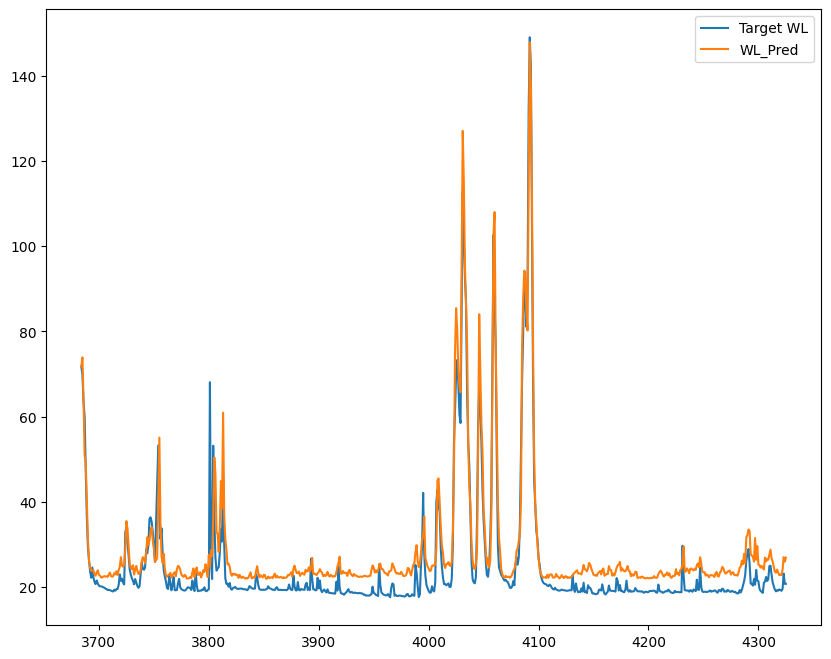

In [60]:
df_final[['Target WL','WL_Pred']][:].plot()

In [61]:
predict=model.predict_generator(pred_generator)

<ipython-input-61-923b28ee74d8>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict=model.predict_generator(pred_generator)


In [71]:
df_pr=pd.concat([pd.DataFrame(predict), pd.DataFrame(x[:,:][win_length:])],axis=1)

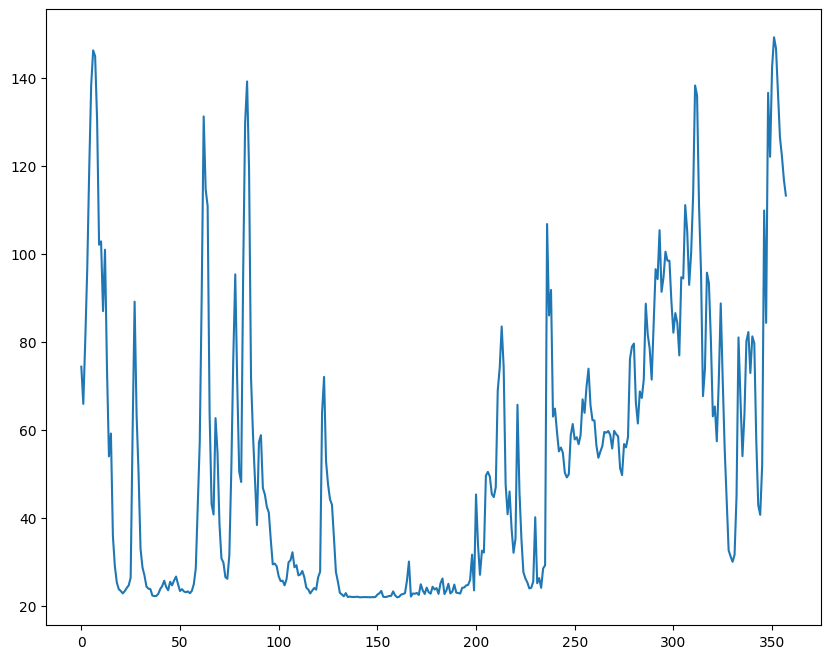

In [78]:
org=scaler.inverse_transform(df_pr)
plt.plot(org[:,0])

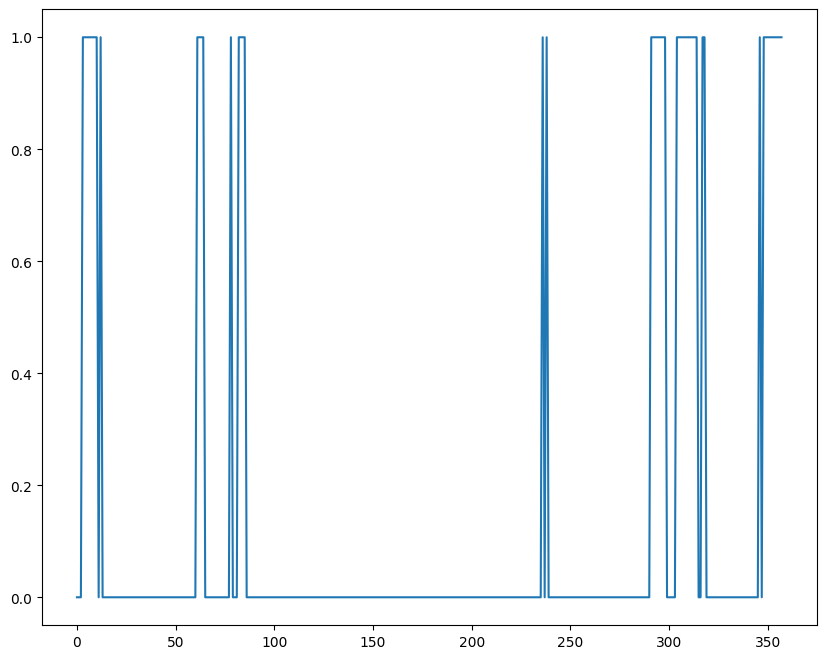

In [82]:
flood2023=[1 if i>=90 else 0 for i in org[:,0]]
plt.plot(flood2023)

In [86]:
df_final['act_flood(0/1 or Y/N)'] = [1 if x >= 90 else 0 for x in df_final['Target WL']]
df_final['pred_flood(0/1 or Y/N)'] = [1 if x >= 90 else 0 for x in df_final['WL_Pred']]
df_final

<ipython-input-86-4f4fa2e517f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['act_flood(0/1 or Y/N)'] = [1 if x >= 90 else 0 for x in df_final['Target WL']]
<ipython-input-86-4f4fa2e517f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['pred_flood(0/1 or Y/N)'] = [1 if x >= 90 else 0 for x in df_final['WL_Pred']]


,Target WL,BRWL1,LaRWL1,LRWL1,WTDWL2,C1RS,C1RS1,C1RS2,C1RS3,C1RS7,...,C3RS1,C3RS2,C3RS3,C3RS7,C3RS14,C3RSF,WL_Pred,act_flood(0/1 or Y/N),pred_flood(0/1 or Y/N),analysis
3684,71.737614,14.849704,148.840764,12.510081,246.939775,4.7,3.987819,4.464866,0.000000,0.000000,...,3.244337,2.804929,3.246285,0.000000,0.384178,4.0,71.797978,0,0,Other
3685,69.803207,14.432456,147.143373,12.342803,247.161619,3.4,3.630098,0.905876,0.000000,0.094780,...,2.742231,0.437591,0.000000,0.000000,0.000000,4.0,73.870456,0,0,Other
3686,63.456758,13.619343,144.141290,10.705385,247.255000,0.9,0.000000,0.000000,0.146116,5.010319,...,0.043631,0.000000,0.004706,2.442484,3.899764,4.0,64.013193,0,0,Other
3687,59.987969,13.122406,142.103774,9.906923,247.256667,0.0,0.000000,0.993902,0.287606,3.427904,...,0.000000,0.356551,0.000000,4.961353,2.908530,4.0,51.018106,0,0,Other
3688,47.506584,9.649922,132.932911,9.331429,247.233750,0.0,0.069207,0.000000,0.000000,0.000000,...,0.079488,0.186685,0.000000,0.000000,0.000000,0.0,49.200034,0,0,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4321,19.093679,2.451022,103.597468,7.748583,243.956000,0.0,9.161683,6.862736,4.347939,4.206158,...,0.000000,5.419976,3.506746,3.325564,0.000000,0.0,22.787109,0,0,Other
4322,19.529924,2.425664,103.860897,8.566926,243.894750,11.8,5.182064,5.157373,7.208479,0.000000,...,9.863716,3.995350,4.262794,6.858315,0.057173,4.0,24.040620,0,0,Other
4323,23.127991,2.838053,106.528125,10.302299,243.906556,4.9,4.520576,5.628847,7.983038,3.084470,...,5.495787,6.515957,9.035480,8.010911,0.211898,4.0,26.997649,0,0,Other
4324,20.716932,2.484042,104.476730,8.928016,243.963727,4.3,12.117782,15.424044,3.683143,3.372005,...,9.400042,7.090957,4.963055,3.590645,10.923110,4.0,25.947217,0,0,Other


In [102]:
df_final['analysis'] = np.where(((df_final['act_flood(0/1 or Y/N)'] == 0) & (df_final['pred_flood(0/1 or Y/N)'] ==0)),"True Negative",np.where(((df_final['act_flood(0/1 or Y/N)'] == 1) & (df_final['pred_flood(0/1 or Y/N)'] ==1)),"True Positive",np.where(((df_final['act_flood(0/1 or Y/N)'] == 1) & (df_final['pred_flood(0/1 or Y/N)'] ==0)),"False Negative","False Positive")))

df_final[['Target WL','WL_Pred','act_flood(0/1 or Y/N)','pred_flood(0/1 or Y/N)','analysis']]

<ipython-input-102-c3485656abab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['analysis'] = np.where(((df_final['act_flood(0/1 or Y/N)'] == 0) & (df_final['pred_flood(0/1 or Y/N)'] ==0)),"True Negative",np.where(((df_final['act_flood(0/1 or Y/N)'] == 1) & (df_final['pred_flood(0/1 or Y/N)'] ==1)),"True Positive",np.where(((df_final['act_flood(0/1 or Y/N)'] == 1) & (df_final['pred_flood(0/1 or Y/N)'] ==0)),"False Negative","False Positive")))


,Target WL,WL_Pred,act_flood(0/1 or Y/N),pred_flood(0/1 or Y/N),analysis
3684,71.737614,71.797978,0,0,True Negative
3685,69.803207,73.870456,0,0,True Negative
3686,63.456758,64.013193,0,0,True Negative
3687,59.987969,51.018106,0,0,True Negative
3688,47.506584,49.200034,0,0,True Negative
...,...,...,...,...,...
4321,19.093679,22.787109,0,0,True Negative
4322,19.529924,24.040620,0,0,True Negative
4323,23.127991,26.997649,0,0,True Negative
4324,20.716932,25.947217,0,0,True Negative


In [103]:
print(df_final['analysis'].value_counts()['True Negative'])
print(df_final['analysis'].value_counts()['True Positive'])
print(df_final['analysis'].value_counts()['False Negative'])
print(df_final['analysis'].value_counts()['False Positive'])

629
9
1
3
